<a href="https://colab.research.google.com/github/dbckz/crossing-the-line/blob/master/notebooks/processing_full_perspective_england.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
import pandas as pd
import ast
import os
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tqdm import tqdm
from google.colab import drive
import plotly.graph_objects as go

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set up paths
root_path = "/content/drive/MyDrive/University/Dissertation/data_collection"
graph_path = root_path + "/graphs"

day_paths = day_paths = [
        "/01",
        "/02",
        "/03",
        "/04",
        "/05",
        "/06",
        "/07",
        "/08",
        "/09",
        "/10",
        "/11",
        "/12",
        "/13",
        "/14",
        "/15",
        "/16",
        "/17",
        "/18",
        "/19",
        "/20",
        "/21",
        "/22",
        "/23",
        "/24",
        "/25",
        "/26",
        "/27",
        "/28",
        "/29",
        "/30",
        "/31",
        "/32",
        "/33",
        "/34",
        "/35",
        "/36"
    ]

In [4]:
# Create directory to store visualisations
try:
    os.mkdir(graph_path)
except OSError as error:
    print(error)

[Errno 17] File exists: '/content/drive/MyDrive/University/Dissertation/data_collection/graphs'


In [6]:
# Load data
in_tweets = pd.DataFrame()
persp = pd.DataFrame()
emojis = pd.DataFrame()
for path in day_paths:
    directory = root_path + path
    tweets_csv = directory + "/tweets.csv"
    persp_csv = directory + "/perspective_processed_tweets.csv"
    emojis_csv = directory + "/emoji.csv"

    print(f"Loading CSVs for directory {path}...")
    in_tweets = pd.concat([in_tweets, 
                           pd.read_csv(tweets_csv,
                                       usecols = [
                                                  'created_at',
                                                  'tweet_id',
                                                  'tweet_text',
                                                  'accounts_mentioned'
                                       ],
                                       dtype = {
                                          # 'created_at':
                                          'tweet_id': np.int64,
                                          'tweet_text': str,
                                          'accounts_mentioned': object
                                       },
                                       parse_dates=['created_at'])])

    persp = pd.concat([persp, pd.read_csv(persp_csv,
                                          usecols = [
                                                      'tweet_id',
                                                      'identity_attack_score',
                                                      'threat_score',
                                                      'severe_toxicity_score',
                                                      'insult_score'
                                                      
                                          ],
                                          dtype = {
                                              'tweet_id': np.int64,
                                              'identity_attack_score': float,
                                              'threat_score': float,
                                              'severe_toxicity_score': float,
                                              'insult_score': float
                                          })])

# Dedup
original_tweets_length = len(in_tweets)
original_persp_length = len(persp)
in_tweets.drop_duplicates(subset=['tweet_id'], inplace=True)
persp.drop_duplicates(subset=['tweet_id'], inplace=True)
print(f"Size of tweets dataframe: {len(in_tweets)}, having dropped {original_tweets_length - len(in_tweets)} duplicate rows")
print(f"Size of perspective dataframe: {len(persp)}, having dropped {original_persp_length - len(persp)} duplicate rows")


Loading CSVs for directory /01...
Loading CSVs for directory /02...
Loading CSVs for directory /03...
Loading CSVs for directory /04...
Loading CSVs for directory /05...
Loading CSVs for directory /06...
Loading CSVs for directory /07...
Loading CSVs for directory /08...
Loading CSVs for directory /09...
Loading CSVs for directory /10...
Loading CSVs for directory /11...
Loading CSVs for directory /12...
Loading CSVs for directory /13...
Loading CSVs for directory /14...
Loading CSVs for directory /15...
Loading CSVs for directory /16...
Loading CSVs for directory /17...
Loading CSVs for directory /18...
Loading CSVs for directory /19...
Loading CSVs for directory /20...
Loading CSVs for directory /21...
Loading CSVs for directory /22...
Loading CSVs for directory /23...
Loading CSVs for directory /24...
Loading CSVs for directory /25...
Loading CSVs for directory /26...
Loading CSVs for directory /27...
Loading CSVs for directory /28...
Loading CSVs for directory /29...
Loading CSVs f

In [7]:
# Up the pandas display limits so printed dataframes aren't so truncated
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_info_columns', 100)
pd.set_option('display.precision', 9)

In [8]:
# Join tables + drop old ones!
joined_df = pd.merge(in_tweets, persp, how='inner', on='tweet_id')
del persp
del in_tweets
len(joined_df)

1478009

In [9]:
joined_df = joined_df[(joined_df['created_at'] > '2021-06-19 08:10:18+00:00') & (joined_df['created_at'] < '2021-07-17 00:00:00+00:00')]
len(joined_df)

1274885

# Analysis

In [10]:
print(f"Number of tweets that Perspective could not process: {len(joined_df[joined_df['identity_attack_score'] == -1.0])}") # might need to do this later...

Number of tweets that Perspective could not process: 91624


In [12]:
# Extract players
list_of_players = ["JPickford1", "kylewalker2", "LukeShaw23", "_DeclanRice", "HarryMaguire93", "JackGrealish",
                    "JHenderson", "HKane", "sterling7", "MarcusRashford", "trippier2", "deanhenderson",
                    "Kalvinphillips", "OfficialTM_3", "Sanchooo10", "CalvertLewin14", "masonmount_10", "PhilFoden",
                    "BenChilwell", "ben6white", "samjohnstone50", "reecejames_24", "BukayoSaka87", "BellinghamJude"]

for player in list_of_players:
    print(f"Extracting {player}...")
    joined_df[player] = joined_df['accounts_mentioned'].str.contains(f"'username': '{player}'").astype(bool)



Extracting JPickford1...
Extracting kylewalker2...
Extracting LukeShaw23...
Extracting _DeclanRice...
Extracting HarryMaguire93...
Extracting JackGrealish...
Extracting JHenderson...
Extracting HKane...
Extracting sterling7...
Extracting MarcusRashford...
Extracting trippier2...
Extracting deanhenderson...
Extracting Kalvinphillips...
Extracting OfficialTM_3...
Extracting Sanchooo10...
Extracting CalvertLewin14...
Extracting masonmount_10...
Extracting PhilFoden...
Extracting BenChilwell...
Extracting ben6white...
Extracting samjohnstone50...
Extracting reecejames_24...
Extracting BukayoSaka87...
Extracting BellinghamJude...


In [14]:
joined_df = joined_df[
    (joined_df["JPickford1"]) |
    (joined_df["kylewalker2"]) |
    (joined_df["LukeShaw23"]) |
    (joined_df["kylewalker2"]) |
    (joined_df["_DeclanRice"]) |
    (joined_df["HarryMaguire93"]) |
    (joined_df["JackGrealish"]) |
    (joined_df["JHenderson"]) |
    (joined_df["HKane"]) |
    (joined_df["sterling7"]) |
    (joined_df["MarcusRashford"]) |
    (joined_df["trippier2"]) |
    (joined_df["deanhenderson"]) |
    (joined_df["Kalvinphillips"]) |
    (joined_df["OfficialTM_3"]) |
    (joined_df["Sanchooo10"]) |
    (joined_df["CalvertLewin14"]) |
    (joined_df["masonmount_10"]) |
    (joined_df["PhilFoden"]) |
    (joined_df["BenChilwell"]) |
    (joined_df["ben6white"]) |
    (joined_df["samjohnstone50"]) |
    (joined_df["reecejames_24"]) |
    (joined_df["BukayoSaka87"]) |
    (joined_df["BellinghamJude"])
    ]

In [15]:
print(len(joined_df))
print(len(joined_df[(joined_df['created_at'] > '2021-06-19 08:10:18+00:00') & (joined_df['created_at'] < '2021-07-17 00:00:00+00:00')]))
print(len(joined_df[(joined_df['created_at'] > '2021-07-11 00:00:00+00:00')]))

823474
823474
433261


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689d725820>]],
      dtype=object)

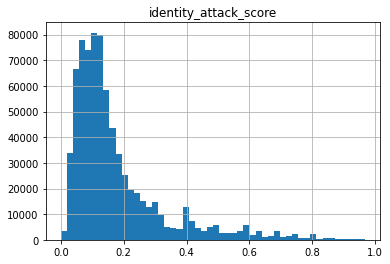

In [16]:
joined_df[joined_df['identity_attack_score'] != -1.0].hist(column = 'identity_attack_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689d55a3d0>]],
      dtype=object)

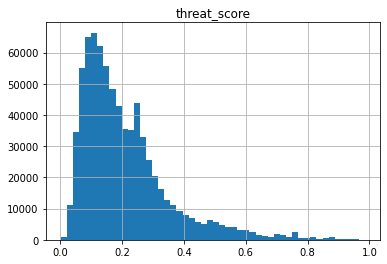

In [17]:
joined_df[joined_df['threat_score'] != -1.0].hist(column = 'threat_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689d3bb3a0>]],
      dtype=object)

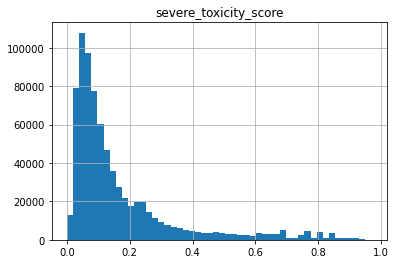

In [18]:
joined_df[joined_df['severe_toxicity_score'] != -1.0].hist(column = 'severe_toxicity_score', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f689d0d2070>]],
      dtype=object)

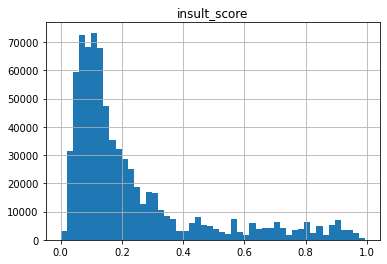

In [19]:
joined_df[joined_df['insult_score'] != -1.0].hist(column = 'insult_score', bins=50)

In [20]:
len_total = len(joined_df)
threshold = 0.5

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.9], joined_df[joined_df['threat_score'] > 0.9], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.9], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.9], how='outer', on='tweet_id')
len_90 = len(tmp)
print(f"Tweets with scores > 0.9: {len_90}, which is {(100 * (len_90 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.8], joined_df[joined_df['threat_score'] > 0.8], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.8], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.8], how='outer', on='tweet_id')
len_80 = len(tmp)
print(f"Tweets with scores > 0.8: {len_80}, which is {(100 * (len_80 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.7], joined_df[joined_df['threat_score'] > 0.7], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.7], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.7], how='outer', on='tweet_id')
len_70 = len(tmp)
print(f"Tweets with scores > 0.7: {len_70}, which is {(100 * (len_70 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.6], joined_df[joined_df['threat_score'] > 0.6], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.6], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.6], how='outer', on='tweet_id')
len_60 = len(tmp)
print(f"Tweets with scores > 0.6: {len_60}, which is {(100 * (len_60 / len_total)):.2f}% of all tweets")

tmp = pd.merge(joined_df[joined_df['identity_attack_score'] > 0.5], joined_df[joined_df['threat_score'] > 0.5], how='outer', on='tweet_id')
tmp = pd.merge(tmp, joined_df[joined_df['severe_toxicity_score'] > 0.5], how='outer', on='tweet_id')
# tmp = pd.merge(tmp, joined_df[joined_df['insult_score'] > 0.5], how='outer', on='tweet_id')
len_50 = len(tmp)
print(f"Tweets with scores > 0.5: {len_50}, which is {(100 * (len_50 / len_total)):.2f}% of all tweets")

joined_df['persp_over_threshold'] = (joined_df['identity_attack_score'] > threshold) | (joined_df['threat_score'] > threshold) | (joined_df['severe_toxicity_score'] > threshold)
                                                                                 
del tmp


Tweets with scores > 0.9: 2905, which is 0.35% of all tweets
Tweets with scores > 0.8: 19183, which is 2.33% of all tweets
Tweets with scores > 0.7: 38461, which is 4.67% of all tweets
Tweets with scores > 0.6: 66387, which is 8.06% of all tweets
Tweets with scores > 0.5: 101090, which is 12.28% of all tweets


<ipython-input-20-9d0bccd7323d>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df['persp_over_threshold'] = (joined_df['identity_attack_score'] > threshold) | (joined_df['threat_score'] > threshold) | (joined_df['severe_toxicity_score'] > threshold)


In [21]:
# Maybe we don't need these cols and we can just calculate ad-hoc?
for player in list_of_players:
    joined_df[f'{player}_offensive'] = joined_df['persp_over_threshold'] & joined_df[player]

<ipython-input-21-8cb72c60f490>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joined_df[f'{player}_offensive'] = joined_df['persp_over_threshold'] & joined_df[player]


In [22]:
player_offensive_tweet_map = pd.DataFrame(columns=["username",
                                                   "tweets_received",
                                                   "offensive_tweets_received",
                                                   "percentage_offensive"
                                                   ])

i = 0
for player in list_of_players:
    off_tweets = joined_df[player + '_offensive'].sum()
    tweets = joined_df[player].sum()
    percentage = 100 * (off_tweets / tweets)
    player_offensive_tweet_map.loc[i] = player, tweets, off_tweets, percentage
    i += 1

In [33]:
name_map = {
    "JPickford1": "Jordan Pickford",
    "kylewalker2": "Kyle Walker",
    "Kalvinphillips": "Kalvin Phillips",
    "ben6white": "Benjamin White",
    "trippier2": "Kieran Trippier",
    "JHenderson": "Jordan Henderson",
    "PhilFoden": "Phil Foden",
    "sterling7": "Raheem Sterling",
    "LukeShaw23": "Luke Shaw",
    "_DeclanRice": "Declan Rice",
    "BellinghamJude": "Jude Bellingham",
    "JackGrealish": "Jack Grealish",
    "HarryMaguire93": "Harry Maguire",
    "MarcusRashford": "Marcus Rashford",
    "BukayoSaka87": "Bukayo Saka",
    "HKane": "Harry Kane",
    "deanhenderson": "Dean Henderson",
    "OfficialTM_3": "Tyrone Mings",
    "Sanchooo10": "Jadon Sancho",
    "CalvertLewin14": "Dominic Calvert-Lewin",
    "masonmount_10": "Mason Mount",
    "BenChilwell": "Ben Chilwell",
    "samjohnstone50": "Sam Johnstone",
    "reecejames_24": "Reece James"
}

player_offensive_tweet_map["player"] = player_offensive_tweet_map["username"].map(name_map)


In [37]:
player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=True)
offensive_tweets_all = joined_df['persp_over_threshold'].sum()
offensive_tweets_top_10 = player_offensive_tweet_map['offensive_tweets_received'].head(10).sum()
top_10_proportion = offensive_tweets_top_10 / offensive_tweets_all
print(f"Total offensive tweets: {offensive_tweets_all}")
print(f"Top 10 proportion: {top_10_proportion * 100}%")

print(player_offensive_tweet_map[['username', 'player', 'offensive_tweets_received']].head(10))

Total offensive tweets: 101090
Top 10 proportion: 5.327925610841825%
          username                 player offensive_tweets_received
11   deanhenderson         Dean Henderson                        41
20  samjohnstone50          Sam Johnstone                        57
15  CalvertLewin14  Dominic Calvert-Lewin                       237
10       trippier2        Kieran Trippier                       296
19       ben6white         Benjamin White                       384
1      kylewalker2            Kyle Walker                       640
21   reecejames_24            Reece James                       655
18     BenChilwell           Ben Chilwell                       683
23  BellinghamJude        Jude Bellingham                      1185
17       PhilFoden             Phil Foden                      1208


In [ ]:
# Saving a file for manual review, taken at threshold 90 - one-off ad-hoc task
# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == True].to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/tweets_persp.csv", index=False)

# joined_df[['tweet_id', 'tweet_text']][joined_df['persp_over_threshold'] == False].sample(1000).to_csv("/content/drive/MyDrive/University/Dissertation/evaluation/inoffensive.csv", index=False)

In [24]:
# Write to file in prep for regression
tweets_regression_file = root_path + "/regression_tweets_england.csv"
joined_df.to_csv(tweets_regression_file, index=False)

# Figures

In [38]:
fig = go.Figure(data=[
    go.Bar(name='offensive', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.offensive_tweets_received, marker_color = "darkred", orientation = 'h'),
    go.Bar(name='total', y=player_offensive_tweet_map.player, x=player_offensive_tweet_map.tweets_received, marker_color="lightgrey", orientation = 'h')
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.update_xaxes(type="log")

fig.show()

In [39]:
fig = go.Figure(data=[
    go.Bar(name='offensive', y=player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=False).player, x=player_offensive_tweet_map.sort_values('offensive_tweets_received', axis=0, ascending=True, inplace=False).offensive_tweets_received, marker_color = "darkred", orientation = 'h')
])
# Change the bar mode

fig.show()

In [25]:
def create_frequency_plot(df, y_values):
    fig = go.Figure()
    for y_value in y_values:
        fig.add_trace(go.Scatter(x=df['created_at'], y=df[y_value],
                      mode='lines',
                      name=y_value))
    return fig

In [26]:
INTERVAL = pd.offsets.Minute(60)

In [27]:
# Plot all tweets frequency
df = joined_df.resample(INTERVAL, on='created_at')['tweet_id'].count().reset_index()
fig = create_frequency_plot(df, ['tweet_id'])
fig.show()

In [30]:
# Plot Sterling, Rashford, Kane tweet frequency
df = joined_df.resample(INTERVAL, on='created_at')['MarcusRashford', 'sterling7', 'Sanchooo10'].sum().reset_index()
fig = create_frequency_plot(df, ['MarcusRashford', 'sterling7', 'Sanchooo10'])
fig.show()

In [29]:
# Plot frequency of offensive tweets
df = joined_df.resample(INTERVAL, on='created_at')['persp_over_threshold'].sum().reset_index()
fig = create_frequency_plot(df, ['persp_over_threshold'])
fig.show()

In [31]:
# Plot Sterling, Rashford, Kane tweet frequency
df = joined_df.resample(INTERVAL, on='created_at')['MarcusRashford_offensive', 'sterling7_offensive', 'Sanchooo10_offensive'].sum().reset_index()
fig = create_frequency_plot(df, ['MarcusRashford_offensive', 'sterling7_offensive', 'Sanchooo10_offensive'])
fig.show()